# Exercises: Linear Regression

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

## Simple Linear Regression

In [2]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [3]:
y = Auto["mpg"]
design = MS(["horsepower"])
X = design.fit_transform(Auto)

model = sm.OLS(y, X)
results1 = model.fit()

summarize(results1)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [4]:
X_new = pd.DataFrame({"horsepower": [98]})
X_new = design.transform(X_new)

y_new = results1.get_prediction(X_new)
y_new.predicted

array([24.46707715])

In [5]:
y_new.conf_int(alpha=.05)

array([[23.97307896, 24.96107534]])

In [6]:
y_new.conf_int(obs=True, alpha=.05)

array([[14.80939607, 34.12475823]])

In [7]:
def abline(ax, b, m, *args, **kwargs):
    """Add a line with slope m and intercept b to ax"""
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

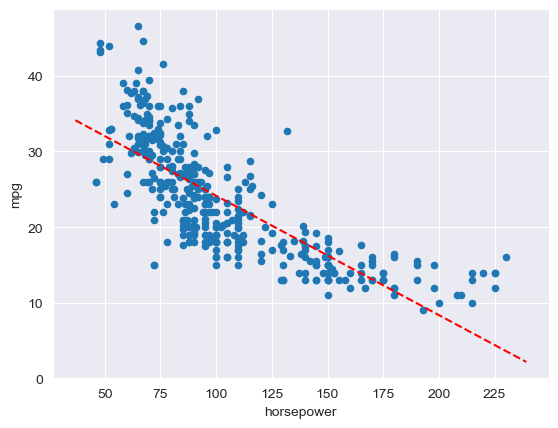

In [8]:
ax = Auto.plot.scatter("horsepower", "mpg")
abline(ax, results1.params[0], results1.params[1], "r--")

In [9]:
results1.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

### Non-linearity


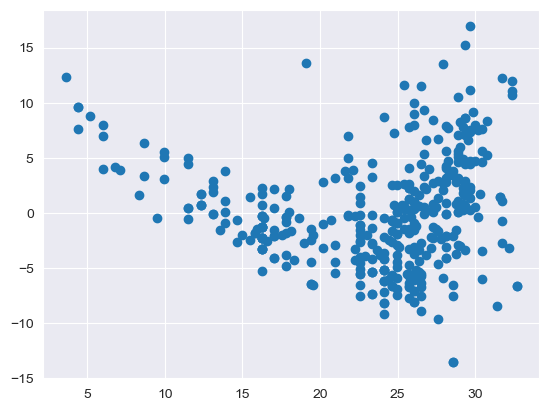

In [10]:
fitted, residuals = results1.fittedvalues, results1.resid
_, ax = plt.subplots()
ax.scatter(fitted, residuals);

In [11]:
X = MS([poly("horsepower", degree=2)]).fit_transform(Auto)

model = sm.OLS(y, X)
results2 = model.fit()

summarize(results2)

,coef,std err,t,P>|t|
intercept,23.4459,0.221,106.130,0.0
"poly(horsepower, degree=2)[0]",-120.1377,4.374,-27.467,0.0
"poly(horsepower, degree=2)[1]",44.0895,4.374,10.080,0.0


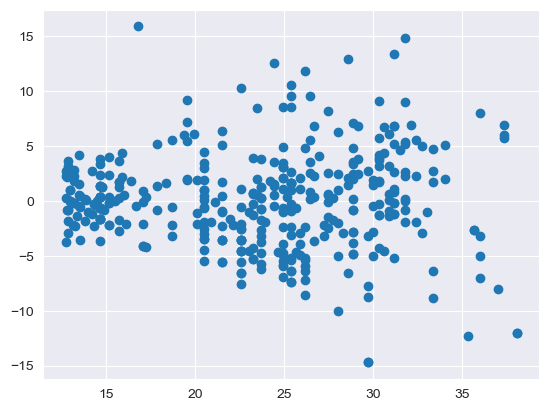

In [12]:
fitted, residuals = results2.fittedvalues, results2.resid
_, ax = plt.subplots()
ax.scatter(fitted, residuals);

### Non-constant variance of error terms


In [13]:
logy = np.log(y)

model = sm.OLS(logy, X)
results2 = model.fit()

summarize(results2)

,coef,std err,t,P>|t|
intercept,3.0983,0.009,347.820,0.0
"poly(horsepower, degree=2)[0]",-5.5818,0.176,-31.649,0.0
"poly(horsepower, degree=2)[1]",1.3976,0.176,7.925,0.0


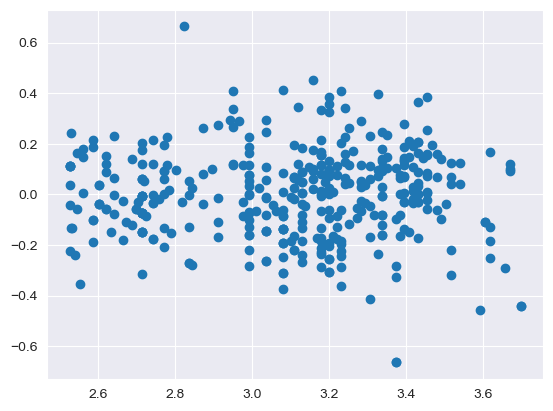

In [14]:
fitted, residuals = results2.fittedvalues, results2.resid
_, ax = plt.subplots()
ax.scatter(fitted, residuals);

## Multiple Linear regression

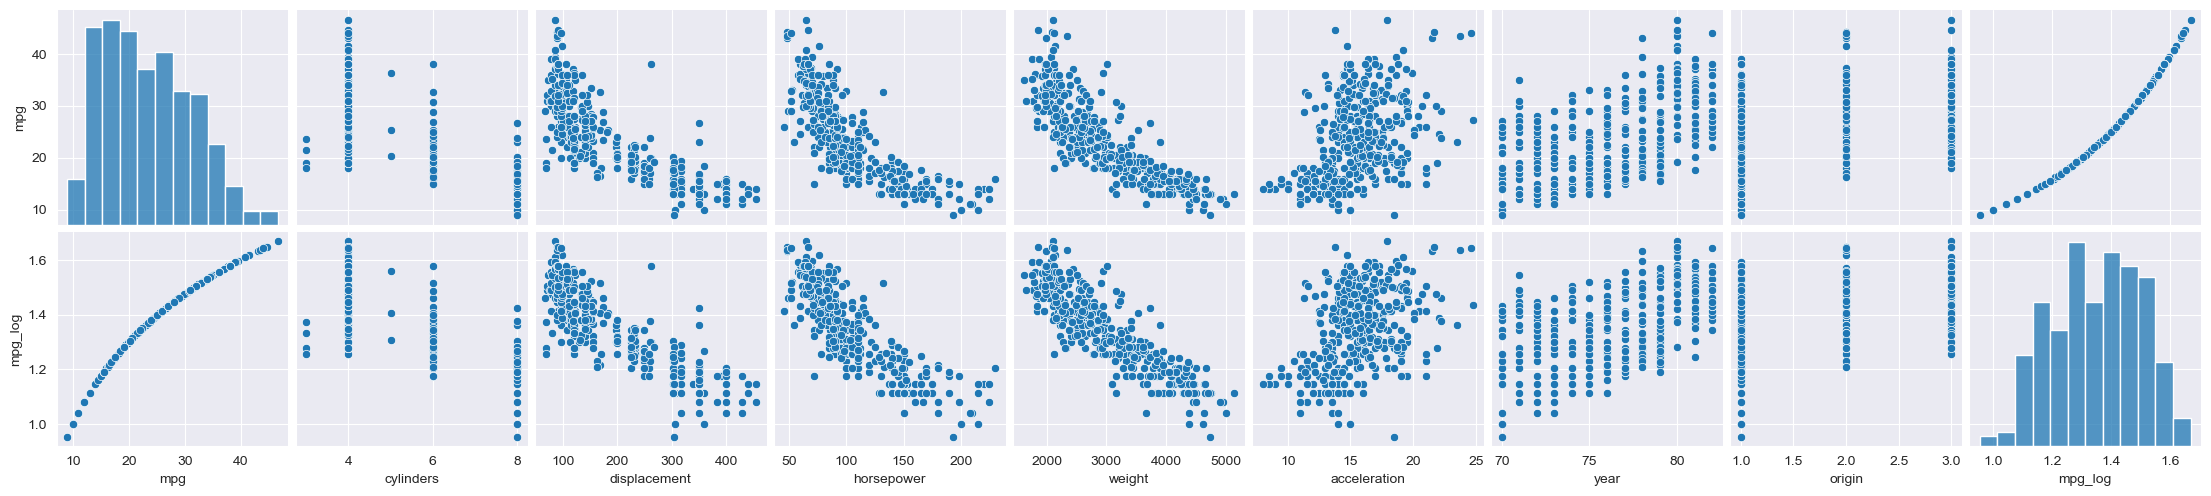

In [15]:
Auto = load_data("Auto").drop(columns="name")
Auto["mpg_log"] = np.log10(Auto["mpg"])
sns.pairplot(Auto, y_vars=["mpg", "mpg_log"]);

In [16]:
Auto.corr().style.background_gradient(cmap="Greys")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_log
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.983909
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.826824
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.853691
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.830155
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.875658
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.447574
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.577275
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.560508
mpg_log,0.983909,-0.826824,-0.853691,-0.830155,-0.875658,0.447574,0.577275,0.560508,1.000000


In [17]:
design = MS(Auto.columns.drop("mpg"))

X = design.fit_transform(Auto)
y = Auto["mpg_log"]

model = sm.OLS(y, X)
results3 = model.fit()

summarize(results3)

,coef,std err,t,P>|t|
intercept,3.136000e-15,9.690000e-15,3.240000e-01,0.746
cylinders,-2.534000e-15,5.990000e-16,-4.233000e+00,0.000
displacement,4.597000e-17,1.390000e-17,3.304000e+00,0.001
horsepower,-9.975000e-18,2.560000e-17,-3.890000e-01,0.697
weight,-1.557000e-18,1.370000e-18,-1.134000e+00,0.257
acceleration,2.429000e-17,1.820000e-16,1.340000e-01,0.894
year,-2.949000e-17,1.220000e-16,-2.430000e-01,0.809
origin,1.034000e-15,5.220000e-16,1.980000e+00,0.048
mpg_log,1.000000e+00,6.030000e-15,1.660000e+14,0.000


In [18]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9.385916e+03,0.0,NaN,NaN,NaN
1,383.0,1.433021e-26,7.0,9385.915872,3.583643e+31,0.0


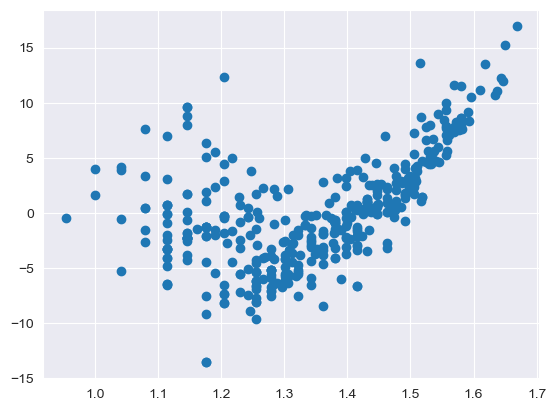

In [19]:
fitted, residuals = results3.fittedvalues, results1.resid
_, ax = plt.subplots()
ax.scatter(fitted, residuals);

13

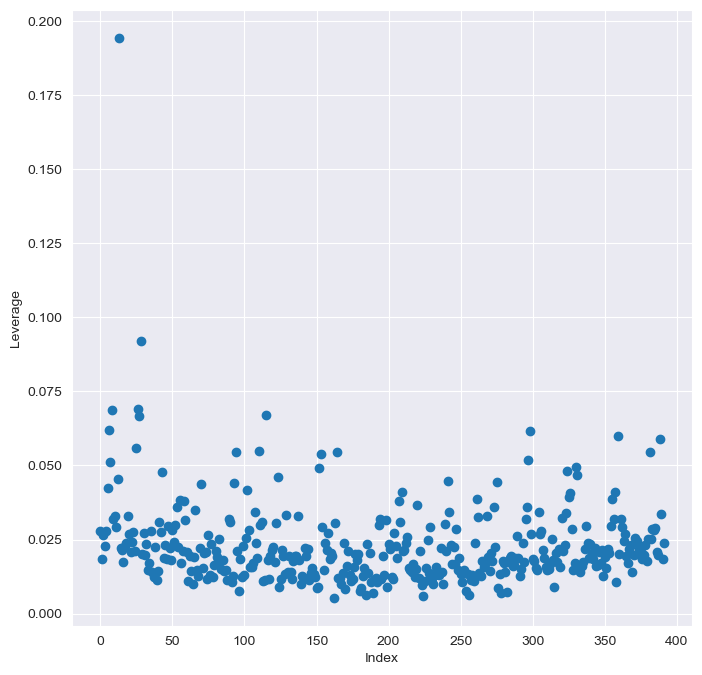

In [20]:
infl = results3.get_influence()
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)

In [21]:
X.iloc[13]

intercept          1.000000
cylinders          8.000000
displacement     455.000000
horsepower       225.000000
weight          3086.000000
acceleration      10.000000
year              70.000000
origin             1.000000
mpg_log            1.146128
Name: 13, dtype: float64

In [22]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({"vif": vals}, index=X.columns[1:])  # exclude intercept
vif

,vif
cylinders,10.900643
displacement,22.154889
horsepower,10.174966
weight,14.201847
acceleration,2.626799
year,2.096934
origin,1.849566
mpg_log,8.299457


## Carseats dataset

In [23]:
Carseats = load_data("Carseats")
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
design = MS(["Price", "Urban", "US"])

X = design.fit_transform(Carseats)
y = Carseats["Sales"]

model = sm.OLS(y, X)
results1 = model.fit()

summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [25]:
design = MS(["Price", "US"])
X = design.fit_transform(Carseats)

model = sm.OLS(y, X)
results2 = model.fit()

summarize(results2)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [26]:
results2.rsquared, results1.rsquared

(0.23926288842678545, 0.23927539218405525)

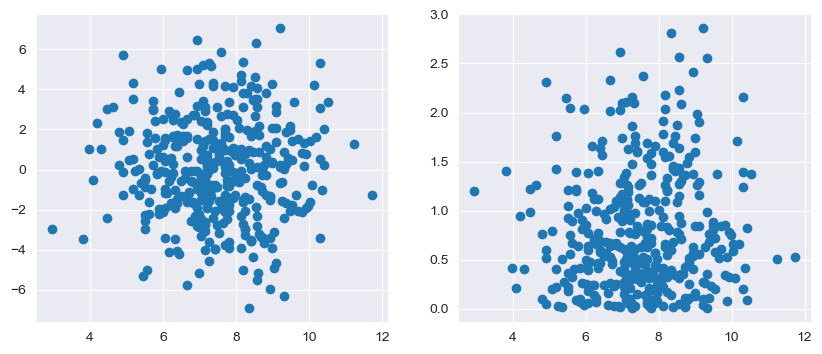

In [27]:
_, axs = plt.subplots(1, 2, figsize=(10, 4))

resid_se = np.sqrt(np.sum(results2.resid**2 / (400 - 2)))

axs[0].scatter(results2.fittedvalues, results2.resid)
axs[1].scatter(results2.fittedvalues, np.abs(results2.resid / resid_se));

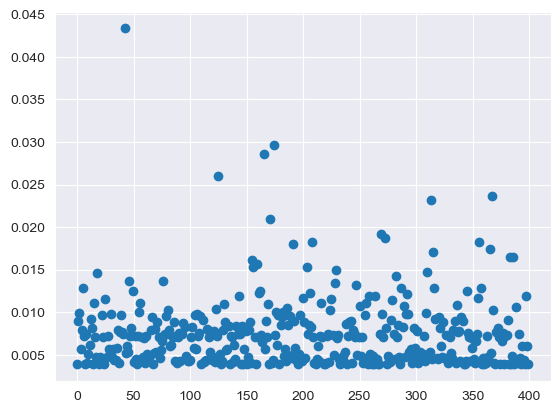

In [28]:
infl = results2.get_influence()
plt.scatter(np.arange(400), infl.hat_matrix_diag)

## Hypothesis test practice

In [29]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [30]:
X = MS(["X"], intercept=False).fit_transform(
    pd.DataFrame({"X": x})
)

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
X,1.9762,0.117,16.898,0.0


In [31]:
X = MS(["Y"], intercept=False).fit_transform(
    pd.DataFrame({"Y": y})
)

model = sm.OLS(x, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
Y,0.3757,0.022,16.898,0.0


## Another simulated data exercise

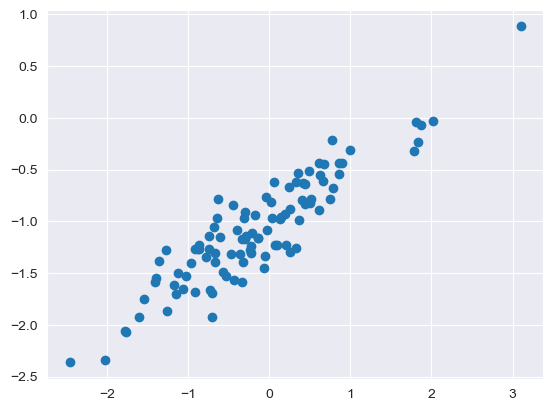

In [32]:
x = rng.normal(size=100)
eps = rng.normal(scale=.25, size=100)

y = -1 + 0.5 * x + eps

plt.scatter(x, y)

In [33]:
X = MS(["X"]).fit_transform(
    pd.DataFrame({"X": x})
)

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0012,0.022,-45.018,0.0
X,0.5237,0.024,21.835,0.0


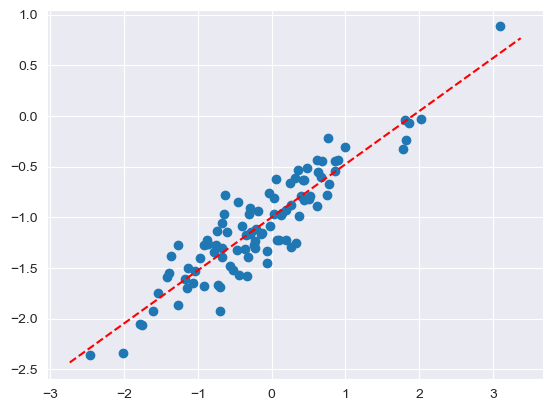

In [34]:
ax = plt.subplots()[1]
ax.scatter(x, y)
abline(ax, results.params[0], results.params[1], "r--")

In [35]:
results.conf_int(alpha=0.05)

,0,1
intercept,-1.045306,-0.957040
X,0.476141,0.571339


## Collinearity problem

In [36]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100)
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [37]:
X = MS(["X1", "X2"]).fit_transform(
    pd.DataFrame({"X1": x1, "X2": x2})
)

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.0
X1,1.9046,0.336,5.662,0.0
X2,0.3643,0.083,4.383,0.0


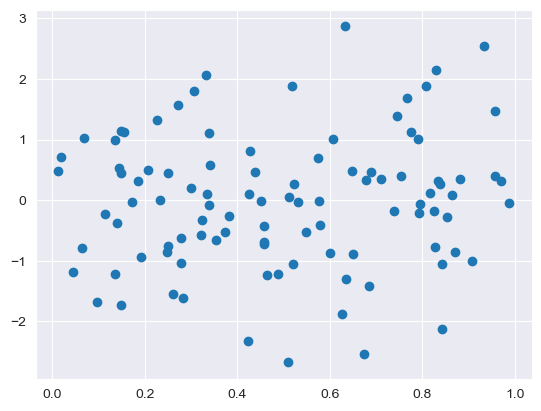

In [38]:
plt.scatter(x1, x2);

In [39]:
X = MS(["X1"]).fit_transform(
    pd.DataFrame({"X1": x1, "X2": x2})
)

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,1.8775,0.206,9.130,0.0
X1,2.0493,0.365,5.622,0.0


In [40]:
X = MS(["X2"]).fit_transform(
    pd.DataFrame({"X1": x1, "X2": x2})
)

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,2.9015,0.104,27.867,0.0
X2,0.4105,0.095,4.325,0.0


In [41]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = MS(["X1", "X2"]).fit_transform(
    pd.DataFrame({"X1": x1, "X2": x2})
)

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,2.0895,0.199,10.481,0.0
X1,1.7092,0.355,4.812,0.0
X2,0.3925,0.088,4.438,0.0


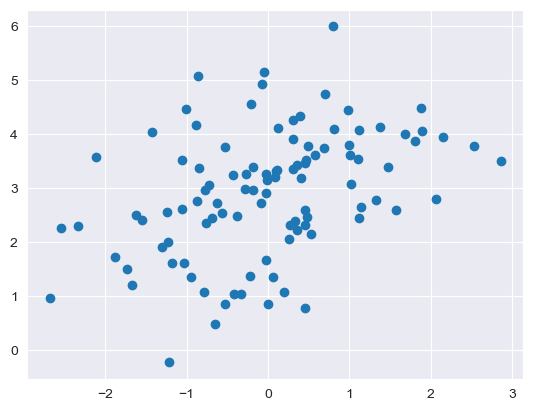

In [42]:
plt.scatter(x2, y)

## Boston data

In [43]:
Boston = load_data("Boston")
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [75]:
cols = Boston.columns.drop("crim")

X = MS(cols).fit_transform(Boston)
y = Boston["crim"]

model = sm.OLS(y, X)
results = model.fit()

coeffs_multi = summarize(results)["coef"][1:]

In [76]:
coeffs_uni = pd.DataFrame()
for col in cols:
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    
    coeffs_uni.loc[col, "coef_uni"] = results.params[1]


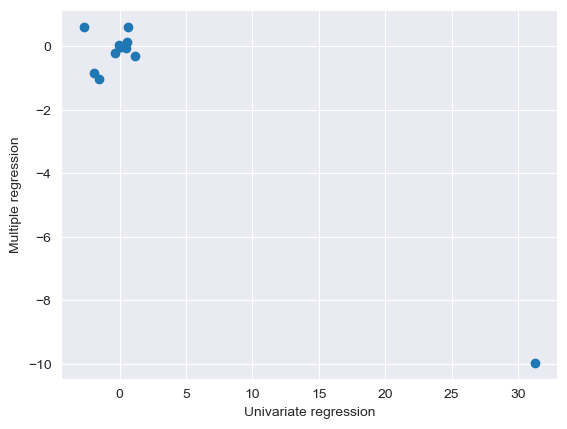

In [79]:
plt.scatter(coeffs_uni, coeffs_multi)
plt.xlabel("Univariate regression")
plt.ylabel("Multiple regression");